In [1]:
# Import datasets, classifiers and performance metrics
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

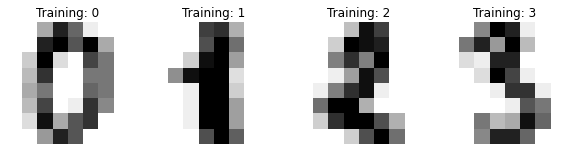

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Train = 50%, Test = 50%

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001, C=100)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

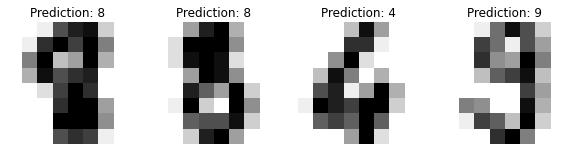

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [6]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  2  4  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


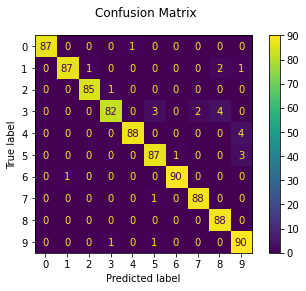

In [7]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Train = 80%, Test = 20%

In [8]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf_2 = svm.SVC(gamma=0.001, C=100)

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

# Learn the digits on the train subset
clf_2.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted_2 = clf_2.predict(X_test)

In [9]:
print(f"Classification report for classifier {clf_2}:\n"
      f"{metrics.classification_report(y_test, predicted_2)}\n")

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      0.84      0.91        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        36
           8       0.86      0.97      0.91        33
           9       0.92      0.95      0.93        37

    accuracy                           0.96       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  2  0  0  4  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  1  0  0  1 35]]


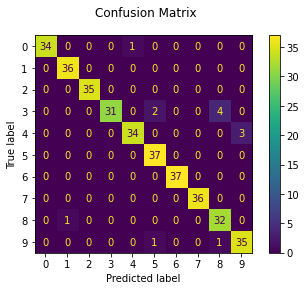

In [10]:
disp = metrics.plot_confusion_matrix(clf_2, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Train = 95%, Test = 5%

In [11]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf_3 = svm.SVC(gamma=0.001, C=100)

# Split data into 95% train and 5% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.05, shuffle=False)

# Learn the digits on the train subset
clf_3.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted_3 = clf_3.predict(X_test)

In [12]:
print(f"Classification report for classifier {clf_3}:\n"
      f"{metrics.classification_report(y_test, predicted_3)}\n")

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        10
           5       0.88      1.00      0.93         7
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        10
           8       0.90      1.00      0.95         9
           9       1.00      1.00      1.00         7

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90




Confusion matrix:
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  1  0  0  1  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  7]]


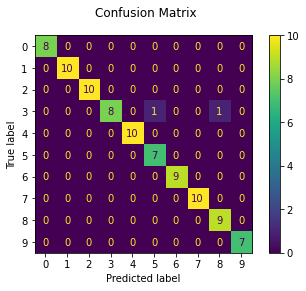

In [13]:
disp = metrics.plot_confusion_matrix(clf_3, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()